# Get them adopted

![Austin-shelter](http://www.austintexas.gov/sites/default/files/aac_logo.jpg)

## Business question:

Austin, Texas is the largest No Kill community in the nation, and home to the Austin Animal Center. They provide shelter to more than 16,000 animals each year and animal protection and pet resource services to all of Austin and Travis County. Annually over 90% of animals entering the center, are adopted, transferred to rescue or returned to their owners.

The Austin Animal Center _also_ has the longest running public dataset of animal rescues in the country. Every animal has a unique id that ties to both their [intake](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and [outcome](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) data when they enter and leave the shelter. Given their data, my questions of interest were:

- What animals need a PR campaign?
- What resources does the Animal Center need?

Analyzing the Austin Animal Center data to answer these questions will assist their mission an improve operations. 

### Defining "Needing PR campaign" as animals that take the longest time to get adopted, or have the fewest transfers to rescue partners.
![img](./images/animals.png)


### For resources, I chose to focus on factors that would impact **cost** and _staffing_:
- breed/specialization of staff
- funds for neutering animals
- average stay of animals - would impact resources needed (food, cleaning, space)
- condition of animals when they enter the shelter
- percent of "special needs" animals - babies/seniors

![img2](./images/pet-resource-center-og.jpg)

### Data

### Methods

### Import packages and process data

`data_cleaning` and `feature_engineering` are packages made to store the functions and code used to prepare the data in seperate namespaces. 

In [23]:
import pandas as pd
import numpy as np
import code_folder.data_cleaning as dc
import code_folder.feature_engineering as fe
import code_folder.visualizations as viz

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
outcomes = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')
intakes = pd.read_csv('https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD')

#### `data_cleaning`
For each intake and outcome file, respectively addresses:
- dates not in the correct datetime format
- column names have mixed cases and spaces 
- an age variable that needs to be replaced
- unnecessary columns tht can be dropped
- create some additional date variables to help merge later

Before merging the datasets to create a record for each animal's stay each year. Length of stay can then be created by comparing the intake and outcome dates.

In [26]:
outcomes = dc.prep_outcomes_file(outcomes)
intakes = dc.prep_intakes_file(intakes)
animal_shelter_df = dc.merge_files(intakes,outcomes)

#### `feature_engineering`

In [27]:
animal_shelter_df = fe.create_species_var(animal_shelter_df)
animal_shelter_df = fe.create_neutered_var(animal_shelter_df)
animal_shelter_df = fe.reduce_breed_list(animal_shelter_df)

In [ ]:
animal_shelter_df.to_csv('./data/cleaned_animal_center_df.csv')

In [2]:
animal_shelter_df = pd.read_csv('./data/cleaned_animal_center_df.csv')

##### `create_species_var`

Exploritory analysis revealed that the two variables that describe the "type" of animal were `animal_type` and `breed`.

While Cat and Dog were straight forward, "Other" appeared to hold a mix of species - both pets and wildlife. The snippet below also shows there is a lot of fuzzy matching within the breed variable. "Rabbit" and "Guinea Pig" each had repeat entries. I created `create_species_var` to map and aggregate the breed and intake_type to provide more insight into the types of animals the shelter services.

In [21]:
#viz.value_counts_table(animal_shelter_df.animal_type.value_counts(), "Count of Animal Type at Intake", "animal_type_i")    
#viz.value_counts_table(animal_shelter_df[animal_shelter_df.animal_type == "Other"].breed.value_counts()[:10], "Short subset of breeds in Other Animal_type", "breeds_i")
viz.value_counts_table(animal_shelter_df.species.value_counts().append(pd.Series(animal_shelter_df.shape[0], index=["Total"])), "Animal Intake since 2013", "species_i")


## Animal Intake



| ![all3](./images/species_i.png) | ![2019a](./images/intake_2019.png)

##### `create_neutered_var` and `reduce_breed_list`

 Neutering of animals at the Austin Animal Center is funded by [The City of Austin and Travis County](https://www.austintexas.gov/page/no-kill-plan), but how many neuterings are they doing a month? Is that number increasing  or decreasing? By comparing the sex of the animal at intake versus the outcome, a change in status from "intact" to "neutered" reveals the animal was neutered during their stay at the Rescue Center.
 
The reduced_breed_list removed "mix" from many of the cat and dog breeds. This allowed "Domestic Shorthair Mix" cats to be counted along with "Domestic Shorthair" and the same with "German Shepard Mix" being count as a "German Shepard."

In [19]:

viz.value_counts_table(animal_shelter_df.loc[animal_shelter_df.year == 2019].species.value_counts().append(pd.Series(animal_shelter_df.loc[animal_shelter_df.year == 2019].shape[0], index=["Total"])), "Animal Intake in 2019", "intake_2019")

![show](./images/intake_2019.png)

#### Revisit our questions

- Age of animals in shelter
- Average animal length of stay
- Medical staff needed

Going to exclude livestock - only 12 and they are pigs and goats sample story animal_id = 103883, 6153 - they get transfered or partner org

ducks: 72688, 51609

## Medical needs

1. How many animals come in injured? And what happens to them?
2. How many animals come in and over their stay get neutered?
3. Any trends in the animals that do not get neutered?

In [143]:
# visualization packages
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker

from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.ticker import FuncFormatter
import seaborn as sns
matplotlib_axes_logger.setLevel('ERROR')


# Set specific parameters for the visualizations
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'xtick.labelsize': med,
          'xtick.minor.bottom':True,
          'ytick.labelsize': med,
          'figure.titlesize': large}




sns.set_style("ticks", { 'axes.spines.top': False, 'axes.spines.right': False, "xtick.major.size": med, "xtick.minor.size": 8, 'axes.titlesize': large, 'ytick.labelsize': med})
plt.rcParams.update(params)


%matplotlib inline

In [116]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False}

In [112]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [168]:
def time_series_plot(dataset,title,xlab,ylab,file_name):
    file_name = file_name
    title = title
    xlab = xlab
    ylab = ylab
    data = dataset.copy()

    fig = plt.figure(figsize=(16, 10), dpi=80) 

    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator(interval=3)  # every month
    years_fmt = mdates.DateFormatter('%b-%Y')
    mon_fmt = mdates.DateFormatter('%b')


    fig, ax = plt.subplots(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

    for col_name in summed_df.columns.tolist():
        ax.plot(summed_df.index, col_name, data=data)

        #ax.plot(summed_df.index, 'Cat', data=summed_df)

    # format the ticks
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_minor_formatter(mon_fmt)

    ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

    # round to nearest years.
    datemin = np.datetime64(summed_df.index.min(), 'Y')
    datemax = np.datetime64(summed_df.index[-1], 'Y') + np.timedelta64(1, 'Y')
    ax.set_xlim(datemin, datemax)

    ax.set_title(title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.legend()


    ax.grid(True, which="both")

    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    fig.autofmt_xdate(which='both')

    path = './images/'+file_name+'.png'
    plt.savefig(path)
    plt.show()
    pass

<Figure size 1280x800 with 0 Axes>

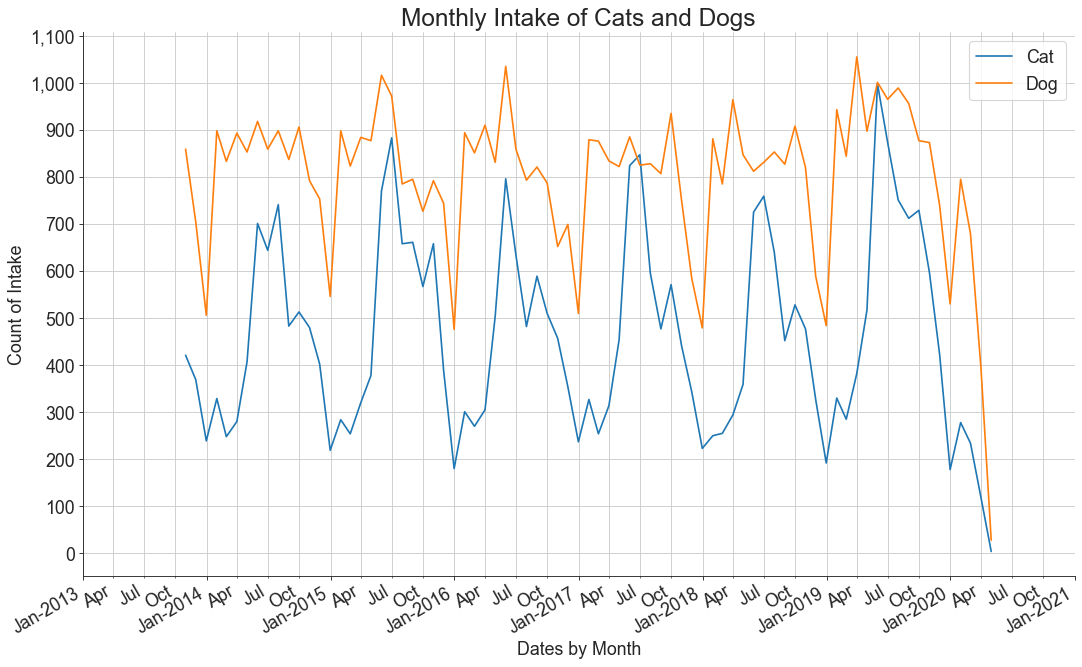

In [169]:
time_series_plot(summed_df,"Monthly Intake of Cats and Dogs","Dates by Month", "Count of Intake", "test_img")

In [31]:
test = animal_shelter_df.loc[(animal_shelter_df['species']=="Dog")].groupby([animal_shelter_df.date_i])["animal_id"].count().to_frame()

In [51]:
test = animal_shelter_df.loc[(animal_shelter_df['species']=="Dog")].groupby([animal_shelter_df.date_i.dt.to_period('M')])["animal_id"].count().to_frame()

In [78]:
summed_df.columns

Index(['Cat', 'Dog'], dtype='object', name='species')

In [174]:
summed_df = animal_shelter_df.loc[(animal_shelter_df['species'].str.contains("Dog|Cat"))].groupby([pd.Grouper(key="date_i",freq='1M'), 'species']).count()\
                .reset_index().pivot(index='date_i', columns='species', values='animal_id')
#fig = plt.figure(figsize=(16, 10), dpi=80) 

In [176]:
summed_df_small_b = animal_shelter_df.loc[(~animal_shelter_df['species'].str.contains("Dog|Cat"))].groupby([pd.Grouper(key="date_i",freq='1M'), 'species']).count()\
.reset_index().pivot(index='date_i', columns='species', values='animal_id')
                .reset_index().pivot(index='date_i', columns='species', values='animal_id')

IndentationError: unexpected indent (<ipython-input-176-9e1054e1f7ec>, line 3)

### Results:

- After dogs and cats, wildlife is the largest category of animals brought to the shelter
- Intake numbers for most species appears to be seasonal, _except_ for Chickens, Rabbits, and Guinea Pigs - hard to plan for

### Business Recommendations

### Limitations

- Missing animals that came back to the shelter more than one time during a year
- Not examining animals still in the shelter
- Do not know specific costs of care or current staffing of Rescue Center


### Next Steps

